## Import Library

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## Gathering Data

In [164]:
df_std = pd.read_csv('./datasets/AWOS Middle/L0250205.csv')
df_uut = pd.read_csv('./datasets/AWOS Middle/PLM_MG_0506feb.csv')

In [165]:
df_std.head()

,Unnamed: 0,Unnamed: 1,PressureMeas_1m,Unnamed: 3,TAStat155_1m_1,Unnamed: 5,RHStat155_1m_1,Unnamed: 7,SRMeasQMS101R_1m,Unnamed: 9,...,QFE_1m,Unnamed: 13,QNH_1m,Unnamed: 15,WS_1m,Unnamed: 17,WD_1m,Unnamed: 19,TGMeasQMT103_1m,Unnamed: 21
0,time,status,Avg,status,Avg,status,Avg,status,Avg,status,...,QF,status,QNH,status,Avg,status,Avg,status,Avg,NaN
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,...,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973,INVALID,0.0,NaN
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,...,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436,INVALID,0.0,NaN
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,...,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137,INVALID,0.0,NaN
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,...,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579,INVALID,0.0,NaN


In [166]:
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,05/02/2025 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,05/02/2025 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,05/02/2025 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,05/02/2025 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,05/02/2025 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


## Preprocessing Data

### Data Alat Standard

Atur ulang header data

In [167]:
set_col_std = ['timestamp', 'statP', 'PressureMeas_1m', 'statTA',
       'TAStat155_1m_1', 'statRH', 'RHStat155_1m_1', 'statSR',
       'SRMeasQMS101R_1m', 'StatPR', 'PRMeasQMR101_1', 'StatQFE',
       'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS', 'WS_1m',
       'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m']
    
df_std = df_std.drop(columns='Unnamed: 21') #hapus kolom lebih
df_std = df_std.drop([0])
df_std.columns = set_col_std #ubah format header standar
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,...,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m,StatTG,TGMeasQMT103_1m
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,...,VALID,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973,INVALID,0.0
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,...,VALID,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436,INVALID,0.0
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,...,VALID,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137,INVALID,0.0
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,...,VALID,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579,INVALID,0.0
5,2/5/25 12:04:06 AM,VALID,1007.314,VALID,24.409,VALID,93.849,VALID,47.185,VALID,...,VALID,1007.314,VALID,1007.171,VALID,1.596,VALID,312.454,INVALID,0.0


Hapus kolom yang tidak penting

In [168]:
df_std.columns

Index(['timestamp', 'statP', 'PressureMeas_1m', 'statTA', 'TAStat155_1m_1',
       'statRH', 'RHStat155_1m_1', 'statSR', 'SRMeasQMS101R_1m', 'StatPR',
       'PRMeasQMR101_1', 'StatQFE', 'QFE_1m', 'StatQNH', 'QNH_1m', 'StatWS',
       'WS_1m', 'StatWD', 'WD_1m', 'StatTG', 'TGMeasQMT103_1m'],
      dtype='object')

In [169]:
df_std = df_std.drop(columns={'StatTG','TGMeasQMT103_1m'})
df_std.head()

,timestamp,statP,PressureMeas_1m,statTA,TAStat155_1m_1,statRH,RHStat155_1m_1,statSR,SRMeasQMS101R_1m,StatPR,PRMeasQMR101_1,StatQFE,QFE_1m,StatQNH,QNH_1m,StatWS,WS_1m,StatWD,WD_1m
1,2/5/25 12:00:07 AM,VALID,1007.317,VALID,24.342,VALID,93.877,VALID,46.279,VALID,0.0,VALID,1007.317,VALID,1007.173,VALID,1.955,VALID,311.973
2,2/5/25 12:01:06 AM,VALID,1007.312,VALID,24.361,VALID,93.832,VALID,46.669,VALID,0.0,VALID,1007.312,VALID,1007.169,VALID,1.455,VALID,305.436
3,2/5/25 12:02:06 AM,VALID,1007.308,VALID,24.372,VALID,93.769,VALID,46.877,VALID,0.0,VALID,1007.308,VALID,1007.165,VALID,1.415,VALID,308.137
4,2/5/25 12:03:06 AM,VALID,1007.316,VALID,24.407,VALID,93.899,VALID,47.097,VALID,0.0,VALID,1007.316,VALID,1007.173,VALID,1.503,VALID,313.579
5,2/5/25 12:04:06 AM,VALID,1007.314,VALID,24.409,VALID,93.849,VALID,47.185,VALID,0.0,VALID,1007.314,VALID,1007.171,VALID,1.596,VALID,312.454


Hapus data **INVALID**

In [170]:
status_cols = [col for col in df_std.columns if col.lower().startswith("stat")]
if status_cols:
    invalid_mask = df_std[status_cols].apply(lambda row: row.str.upper().str.contains("INVALID"), axis=1).any(axis=1)
    df_std = df_std[~invalid_mask]

Hapus data kosong

In [171]:
df_std.isna().sum()

timestamp           0
statP               0
PressureMeas_1m     0
statTA              0
TAStat155_1m_1      0
statRH              0
RHStat155_1m_1      0
statSR              0
SRMeasQMS101R_1m    0
StatPR              0
PRMeasQMR101_1      0
StatQFE             0
QFE_1m              0
StatQNH             0
QNH_1m              0
StatWS              0
WS_1m               0
StatWD              0
WD_1m               0
dtype: int64

Sesuaikan tipe data tiap kolom

In [172]:
df_std['timestamp'] = pd.to_datetime(df_std['timestamp'],format="%m/%d/%y %I:%M:%S %p",errors='coerce')
if status_cols:
    df_std = df_std.drop(columns=status_cols)
exclude_cols = ['timestamp']
for col in df_std.columns:
        if col not in exclude_cols:
            df_std[col] = pd.to_numeric(df_std[col], errors='coerce')
df_std.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
1,2025-02-05 00:00:07,1007.317,24.342,93.877,46.279,0.0,1007.317,1007.173,1.955,311.973
2,2025-02-05 00:01:06,1007.312,24.361,93.832,46.669,0.0,1007.312,1007.169,1.455,305.436
3,2025-02-05 00:02:06,1007.308,24.372,93.769,46.877,0.0,1007.308,1007.165,1.415,308.137
4,2025-02-05 00:03:06,1007.316,24.407,93.899,47.097,0.0,1007.316,1007.173,1.503,313.579
5,2025-02-05 00:04:06,1007.314,24.409,93.849,47.185,0.0,1007.314,1007.171,1.596,312.454


In [173]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1 to 1352
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         1324 non-null   datetime64[ns]
 1   PressureMeas_1m   1324 non-null   float64       
 2   TAStat155_1m_1    1324 non-null   float64       
 3   RHStat155_1m_1    1324 non-null   float64       
 4   SRMeasQMS101R_1m  1324 non-null   float64       
 5   PRMeasQMR101_1    1324 non-null   float64       
 6   QFE_1m            1324 non-null   float64       
 7   QNH_1m            1324 non-null   float64       
 8   WS_1m             1324 non-null   float64       
 9   WD_1m             1324 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 113.8 KB


In [174]:
df_std['timestamp']

1      2025-02-05 00:00:07
2      2025-02-05 00:01:06
3      2025-02-05 00:02:06
4      2025-02-05 00:03:06
5      2025-02-05 00:04:06
               ...        
1348   2025-02-05 23:55:06
1349   2025-02-05 23:56:06
1350   2025-02-05 23:57:07
1351   2025-02-05 23:58:06
1352   2025-02-05 23:59:06
Name: timestamp, Length: 1324, dtype: datetime64[ns]

Cek Anomali Data

In [175]:
df_std.describe(include='all')

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m
count,1324,1324.000000,1324.000000,1324.000000,1324.000000,1324.0,1324.000000,1324.000000,1324.000000,1324.000000
mean,2025-02-05 12:44:22.277945600,1007.200292,26.255381,86.115361,111.036245,0.0,1007.200292,1007.056856,2.152454,275.464620
min,2025-02-05 00:00:07,1004.487000,23.559000,65.550000,-0.028000,0.0,1004.487000,1004.344000,0.054000,38.226000
25%,2025-02-05 07:26:51,1006.274500,24.573250,74.715000,0.006000,0.0,1006.274500,1006.131500,1.349000,259.027000
50%,2025-02-05 12:57:37,1007.518500,25.066500,91.632000,0.027000,0.0,1007.518500,1007.375000,1.908000,299.464500
75%,2025-02-05 18:28:21,1008.342000,28.736250,95.133500,111.265500,0.0,1008.342000,1008.199000,2.808750,314.280000
max,2025-02-05 23:59:06,1009.270000,30.602000,96.859000,1181.841000,0.0,1009.270000,1009.126000,6.288000,350.587000
std,NaN,1.376572,2.184921,10.352785,209.501116,0.0,1.376572,1.376410,1.059750,59.784143


### Data alat UUT

Cek komposisi data 

In [176]:
df_uut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date and Time        1680 non-null   object 
 1   Air Tmp (C) M        1588 non-null   float64
 2   BP 1 Min (inHg) M    1588 non-null   float64
 3   Mag WD (deg) M       1588 non-null   float64
 4   RH (%) M             1588 non-null   float64
 5   Solar Rad (W/m^2) M  1588 non-null   float64
 6   WS (kt) M            1588 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.0+ KB


Sesuaikan tipe data

In [177]:
df_uut['Date and Time'] = pd.to_datetime(df_uut['Date and Time'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df_uut.head()

,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-05 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,2025-02-05 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,2025-02-05 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,2025-02-05 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,2025-02-05 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


Hapus data kosong

In [178]:
df_uut = df_uut.dropna()
df_uut.isna().sum()

Date and Time          0
Air Tmp (C) M          0
BP 1 Min (inHg) M      0
Mag WD (deg) M         0
RH (%) M               0
Solar Rad (W/m^2) M    0
WS (kt) M              0
dtype: int64

In [179]:
df_uut['Date and Time']

0      2025-02-05 00:00:00
1      2025-02-05 00:01:00
2      2025-02-05 00:02:00
3      2025-02-05 00:03:00
4      2025-02-05 00:04:00
               ...        
1583   2025-02-06 02:23:00
1584   2025-02-06 02:24:00
1585   2025-02-06 02:25:00
1586   2025-02-06 02:26:00
1587   2025-02-06 02:27:00
Name: Date and Time, Length: 1588, dtype: datetime64[ns]

### Gabung data **Standar** dan **UUT**

Urutkan data

In [180]:
df_standard_sorted = df_std.sort_values(['timestamp'])
df_uut_sorted = df_uut.sort_values(['Date and Time'])

Satukan data

In [181]:
    df_merged = pd.merge_asof(
        df_standard_sorted,
        df_uut_sorted,
        left_on='timestamp',
        right_on='Date and Time',
        direction='nearest',
        tolerance=pd.Timedelta('1min')
    )

Hapus baris data yang tidak lengkap

In [182]:
df_merged.isna().sum()

timestamp              0
PressureMeas_1m        0
TAStat155_1m_1         0
RHStat155_1m_1         0
SRMeasQMS101R_1m       0
PRMeasQMR101_1         0
QFE_1m                 0
QNH_1m                 0
WS_1m                  0
WD_1m                  0
Date and Time          0
Air Tmp (C) M          0
BP 1 Min (inHg) M      0
Mag WD (deg) M         0
RH (%) M               0
Solar Rad (W/m^2) M    0
WS (kt) M              0
dtype: int64

In [183]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            1324 non-null   datetime64[ns]
 1   PressureMeas_1m      1324 non-null   float64       
 2   TAStat155_1m_1       1324 non-null   float64       
 3   RHStat155_1m_1       1324 non-null   float64       
 4   SRMeasQMS101R_1m     1324 non-null   float64       
 5   PRMeasQMR101_1       1324 non-null   float64       
 6   QFE_1m               1324 non-null   float64       
 7   QNH_1m               1324 non-null   float64       
 8   WS_1m                1324 non-null   float64       
 9   WD_1m                1324 non-null   float64       
 10  Date and Time        1324 non-null   datetime64[ns]
 11  Air Tmp (C) M        1324 non-null   float64       
 12  BP 1 Min (inHg) M    1324 non-null   float64       
 13  Mag WD (deg) M       1324 non-nul

In [184]:
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M
0,2025-02-05 00:00:07,1007.317,24.342,93.877,46.279,0.0,1007.317,1007.173,1.955,311.973,2025-02-05 00:00:00,24.11,29.75,302.0,99.3,35.7400,2.0
1,2025-02-05 00:01:06,1007.312,24.361,93.832,46.669,0.0,1007.312,1007.169,1.455,305.436,2025-02-05 00:01:00,24.17,29.75,313.0,99.3,38.5992,2.0
2,2025-02-05 00:02:06,1007.308,24.372,93.769,46.877,0.0,1007.308,1007.165,1.415,308.137,2025-02-05 00:02:00,24.17,29.75,296.0,99.3,42.8880,4.0
3,2025-02-05 00:03:06,1007.316,24.407,93.899,47.097,0.0,1007.316,1007.173,1.503,313.579,2025-02-05 00:03:00,24.17,29.75,326.0,99.3,47.1768,3.0
4,2025-02-05 00:04:06,1007.314,24.409,93.849,47.185,0.0,1007.314,1007.171,1.596,312.454,2025-02-05 00:04:00,24.11,29.75,307.0,99.3,48.6064,2.0


Hapus sebagian data di awal dan akhir karena sebagian data di awal sensor masih belum stabil, dan sebagian data di akhir saat sensor sedang dilepas

In [185]:
df_merged = df_merged.iloc[70:-70]

## Interpolasi dan Koreksi Data

### Pemetaan Header

In [186]:
df_merged.columns

Index(['timestamp', 'PressureMeas_1m', 'TAStat155_1m_1', 'RHStat155_1m_1',
       'SRMeasQMS101R_1m', 'PRMeasQMR101_1', 'QFE_1m', 'QNH_1m', 'WS_1m',
       'WD_1m', 'Date and Time', 'Air Tmp (C) M', 'BP 1 Min (inHg) M',
       'Mag WD (deg) M', 'RH (%) M', 'Solar Rad (W/m^2) M', 'WS (kt) M'],
      dtype='object')

In [189]:
PP_col = ['PressureMeas_1m','BP 1 Min (inHg) M']
TT_col = ['TAStat155_1m_1','Air Tmp (C) M']
RH_col = ['RHStat155_1m_1','RH (%) M']
WS_col = ['WS_1m','WS (kt) M']
WD_col = ['WD_1m','Mag WD (deg) M']
SR_col = ['SRMeasQMS101R_1m','Solar Rad (W/m^2) M']
WT_col = []

### Konversi Satuan

In [204]:
# Fungsi konversi dari standar ke satuan UUT
def convert_std_to_uut_unit(value, from_unit, to_unit):
    if from_unit == to_unit or "-" in (from_unit, to_unit):
        return value
    if from_unit == "InHg" and to_unit == "hPa":
        return value * 33.86388
    if from_unit == "hPa" and to_unit == "InHg":
        return value / 33.86388
    if from_unit == "m/s" and to_unit == "knot":
        return value / 0.514444
    if from_unit == "knot" and to_unit == "m/s":
        return value * 0.514444
    return value

Konversi Satuan Tekanan **(InHg to hPa)**

In [206]:
df_merged['PP_uut_hPa'] = df_merged[PP_col[1]].apply(lambda x: convert_std_to_uut_unit(x, 'InHg', 'hPa'))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa
70,2025-02-05 01:10:06,1008.577,25.376,89.494,24.685,0.0,1008.577,1008.433,1.529,297.263,2025-02-05 01:10:00,25.06,29.79,297.0,99.3,97.2128,5.0,1008.804985
71,2025-02-05 01:11:06,1008.585,25.450,89.812,25.205,0.0,1008.585,1008.441,1.703,299.340,2025-02-05 01:11:00,25.00,29.79,308.0,99.3,108.6496,4.0,1008.804985
72,2025-02-05 01:12:06,1008.590,25.462,89.334,24.960,0.0,1008.590,1008.446,1.663,287.004,2025-02-05 01:12:00,25.06,29.79,297.0,99.3,134.3824,3.0,1008.804985
73,2025-02-05 01:13:06,1008.592,25.482,88.730,24.266,0.0,1008.592,1008.449,1.807,283.940,2025-02-05 01:13:00,25.06,29.79,304.0,99.3,150.1080,4.0,1008.804985
74,2025-02-05 01:14:06,1008.611,25.507,89.011,24.261,0.0,1008.611,1008.467,2.154,294.349,2025-02-05 01:14:00,25.06,29.79,297.0,99.3,155.8264,3.0,1008.804985


Konversi Satuan Kecepatan Angin **(knot to m/s)**

In [ ]:
df_merged['WS_uut_m/s'] = df_merged[WS_col[1]].apply(lambda x: convert_std_to_uut_unit(x, 'knot', 'm/s'))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s
70,2025-02-05 01:10:06,1008.577,25.376,89.494,24.685,0.0,1008.577,1008.433,1.529,297.263,2025-02-05 01:10:00,25.06,29.79,297.0,99.3,97.2128,5.0,1008.804985,2.572220
71,2025-02-05 01:11:06,1008.585,25.450,89.812,25.205,0.0,1008.585,1008.441,1.703,299.340,2025-02-05 01:11:00,25.00,29.79,308.0,99.3,108.6496,4.0,1008.804985,2.057776
72,2025-02-05 01:12:06,1008.590,25.462,89.334,24.960,0.0,1008.590,1008.446,1.663,287.004,2025-02-05 01:12:00,25.06,29.79,297.0,99.3,134.3824,3.0,1008.804985,1.543332
73,2025-02-05 01:13:06,1008.592,25.482,88.730,24.266,0.0,1008.592,1008.449,1.807,283.940,2025-02-05 01:13:00,25.06,29.79,304.0,99.3,150.1080,4.0,1008.804985,2.057776
74,2025-02-05 01:14:06,1008.611,25.507,89.011,24.261,0.0,1008.611,1008.467,2.154,294.349,2025-02-05 01:14:00,25.06,29.79,297.0,99.3,155.8264,3.0,1008.804985,1.543332


In [211]:
df_merged.describe()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,Date and Time,Air Tmp (C) M,BP 1 Min (inHg) M,Mag WD (deg) M,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s
count,1184,1184.000000,1184.000000,1184.000000,1184.000000,1184.0,1184.000000,1184.000000,1184.000000,1184.000000,1184,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,2025-02-05 12:49:39.908783872,1007.108147,26.457174,85.298869,120.980075,0.0,1007.108147,1006.964726,2.194978,272.129217,2025-02-05 12:49:33.851351296,26.318590,29.741951,261.918074,90.502280,123.609688,4.771959,1007.177860,2.454906
min,2025-02-05 01:10:06,1004.487000,23.559000,65.550000,-0.028000,0.0,1004.487000,1004.344000,0.054000,38.226000,2025-02-05 01:10:00,23.610000,29.660000,2.000000,69.200000,0.000000,0.000000,1004.402681,0.000000
25%,2025-02-05 08:01:51,1005.932000,24.819750,73.711500,0.005000,0.0,1005.932000,1005.789000,1.348250,251.243750,2025-02-05 08:01:45,24.670000,29.710000,284.000000,78.375000,0.000000,3.000000,1006.095875,1.543332
50%,2025-02-05 12:57:37,1007.316500,25.319500,91.388500,0.017500,0.0,1007.316500,1007.173000,1.929500,298.835500,2025-02-05 12:57:30,25.110000,29.750000,319.000000,99.300000,0.000000,4.000000,1007.450430,2.057776
75%,2025-02-05 17:53:21,1008.359000,28.929500,95.177000,159.412750,0.0,1008.359000,1008.215250,2.934500,314.189000,2025-02-05 17:53:15,28.780000,29.780000,337.000000,99.300000,200.501400,6.000000,1008.466346,3.086664
max,2025-02-05 22:49:06,1009.270000,30.602000,96.859000,1181.841000,0.0,1009.270000,1009.126000,6.288000,350.587000,2025-02-05 22:49:00,30.500000,29.810000,360.000000,99.400000,1110.799200,16.000000,1009.482263,8.231104
std,NaN,1.424574,2.221571,10.626271,219.350428,0.0,1.424574,1.424408,1.098336,62.129328,NaN,2.209648,0.042450,123.970810,11.166481,204.735515,2.534034,1.437530,1.303618


Ubah pemetaan header

In [208]:
PP_col[1]="PP_uut_hPa"
WS_col[1]='WS_uut_m/s'
PP_col

['PressureMeas_1m', 'PP_uut_hPa']

### Interpolasi Koreksi Alat Standar

In [235]:
db_koreksi = pd.read_json('correction.json')
id_std = "AWS6"

In [ ]:
def cari_koreksi_scipy(aws, parameter, nilai_baca):
    
    daftar_koreksi = db_koreksi[aws][parameter]
    daftar_koreksi = sorted(daftar_koreksi, key=lambda x: x['setpoin'])
    
    setpoints = [item['setpoin'] for item in daftar_koreksi]
    koreksis = [item['koreksi'] for item in daftar_koreksi]

    interpolator = interp1d(
        setpoints,
        koreksis,
        kind='linear',
        fill_value=(koreksis[0], koreksis[-1]),  # Extrapolasi jika di luar range
        bounds_error=False
    )

    koreksi = interpolator(nilai_baca)
    return koreksi


In [237]:
df_merged['koreksi_TT_std']=df_merged[TT_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "TT", x))
df_merged['koreksi_RH_std']=df_merged[RH_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "RH", x))
df_merged['koreksi_WS_std']=df_merged[WS_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "WS", x))
df_merged['koreksi_WD_std']=df_merged[WD_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "WD", x))
df_merged['koreksi_PP_std']=df_merged[PP_col[0]].apply(lambda x: cari_koreksi_scipy(id_std, "PP", x))
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,RH (%) M,Solar Rad (W/m^2) M,WS (kt) M,PP_uut_hPa,WS_uut_m/s,koreksi_TT_std,koreksi_RH_std,koreksi_WS_std,koreksi_WD_std,koreksi_PP_std
70,2025-02-05 01:10:06,1008.577,25.376,89.494,24.685,0.0,1008.577,1008.433,1.529,297.263,...,99.3,97.2128,5.0,1008.804985,2.572220,0.060484,1.022309,0.390000,-0.916383,-0.008183
71,2025-02-05 01:11:06,1008.585,25.450,89.812,25.205,0.0,1008.585,1008.441,1.703,299.340,...,99.3,108.6496,4.0,1008.804985,2.057776,0.060779,1.043763,0.388856,-0.886045,-0.008178
72,2025-02-05 01:12:06,1008.590,25.462,89.334,24.960,0.0,1008.590,1008.446,1.663,287.004,...,99.3,134.3824,3.0,1008.804985,1.543332,0.060827,1.011514,0.389300,-1.066234,-0.008174
73,2025-02-05 01:13:06,1008.592,25.482,88.730,24.266,0.0,1008.592,1008.449,1.807,283.940,...,99.3,150.1080,4.0,1008.804985,2.057776,0.060907,0.970765,0.387700,-1.110989,-0.008173
74,2025-02-05 01:14:06,1008.611,25.507,89.011,24.261,0.0,1008.611,1008.467,2.154,294.349,...,99.3,155.8264,3.0,1008.804985,1.543332,0.061007,0.989723,0.383844,-0.958947,-0.008159


### Hitung nilai koreksi

In [244]:
df_merged['TT_std']=df_merged[TT_col[0]] + df_merged['koreksi_TT_std']
df_merged['RH_std']=df_merged[RH_col[0]] + df_merged['koreksi_RH_std']
df_merged['PP_std']=df_merged[PP_col[0]] + df_merged['koreksi_PP_std']
df_merged['WS_std']=df_merged[WS_col[0]] + df_merged['koreksi_WS_std']
df_merged['WD_std']=df_merged[TT_col[0]] + df_merged['koreksi_WD_std']
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,koreksi_TT_std,koreksi_RH_std,koreksi_WS_std,koreksi_WD_std,koreksi_PP_std,TT_std,RH_std,PP_std,WS_std,WD_std
70,2025-02-05 01:10:06,1008.577,25.376,89.494,24.685,0.0,1008.577,1008.433,1.529,297.263,...,0.060484,1.022309,0.390000,-0.916383,-0.008183,25.436484,90.516309,1008.568817,1.919000,24.459617
71,2025-02-05 01:11:06,1008.585,25.450,89.812,25.205,0.0,1008.585,1008.441,1.703,299.340,...,0.060779,1.043763,0.388856,-0.886045,-0.008178,25.510779,90.855763,1008.576822,2.091856,24.563955
72,2025-02-05 01:12:06,1008.590,25.462,89.334,24.960,0.0,1008.590,1008.446,1.663,287.004,...,0.060827,1.011514,0.389300,-1.066234,-0.008174,25.522827,90.345514,1008.581826,2.052300,24.395766
73,2025-02-05 01:13:06,1008.592,25.482,88.730,24.266,0.0,1008.592,1008.449,1.807,283.940,...,0.060907,0.970765,0.387700,-1.110989,-0.008173,25.542907,89.700765,1008.583827,2.194700,24.371011
74,2025-02-05 01:14:06,1008.611,25.507,89.011,24.261,0.0,1008.611,1008.467,2.154,294.349,...,0.061007,0.989723,0.383844,-0.958947,-0.008159,25.568007,90.000723,1008.602841,2.537844,24.548053


In [245]:
TT_col[0] = "TT_std"
RH_col[0] = "RH_std"
PP_col[0] = "PP_std"
WS_col[0] = "WS_std"
WD_col[0] = "WD_std"

In [259]:
df_merged['koreksi_TT_uut']=df_merged[TT_col[0]] - df_merged[TT_col[1]]
df_merged['koreksi_RH_uut']=df_merged[RH_col[0]] - df_merged[RH_col[1]]
df_merged['koreksi_WS_uut']=df_merged[WS_col[0]] - df_merged[WS_col[1]]
df_merged['koreksi_WD_uut']=(df_merged[WD_col[0]] - df_merged[WD_col[1]] + 180) % 360 -180
df_merged['koreksi_PP_uut']=df_merged[PP_col[0]] - df_merged[PP_col[1]]
df_merged.head()

,timestamp,PressureMeas_1m,TAStat155_1m_1,RHStat155_1m_1,SRMeasQMS101R_1m,PRMeasQMR101_1,QFE_1m,QNH_1m,WS_1m,WD_1m,...,TT_std,RH_std,PP_std,WS_std,WD_std,koreksi_TT_uut,koreksi_RH_uut,koreksi_WS_uut,koreksi_WD_uut,koreksi_PP_uut
70,2025-02-05 01:10:06,1008.577,25.376,89.494,24.685,0.0,1008.577,1008.433,1.529,297.263,...,25.436484,90.516309,1008.568817,1.919000,24.459617,0.376484,-8.783691,-0.653220,87.459617,-0.236169
71,2025-02-05 01:11:06,1008.585,25.450,89.812,25.205,0.0,1008.585,1008.441,1.703,299.340,...,25.510779,90.855763,1008.576822,2.091856,24.563955,0.510779,-8.444237,0.034080,76.563955,-0.228163
72,2025-02-05 01:12:06,1008.590,25.462,89.334,24.960,0.0,1008.590,1008.446,1.663,287.004,...,25.522827,90.345514,1008.581826,2.052300,24.395766,0.462827,-8.954486,0.508968,87.395766,-0.223159
73,2025-02-05 01:13:06,1008.592,25.482,88.730,24.266,0.0,1008.592,1008.449,1.807,283.940,...,25.542907,89.700765,1008.583827,2.194700,24.371011,0.482907,-9.599235,0.136924,80.371011,-0.221158
74,2025-02-05 01:14:06,1008.611,25.507,89.011,24.261,0.0,1008.611,1008.467,2.154,294.349,...,25.568007,90.000723,1008.602841,2.537844,24.548053,0.508007,-9.299277,0.994512,87.548053,-0.202145


In [263]:
#Kesimpulan
summary = {}
df_summary = pd.DataFrame(summary)
df_summary["Parameter"] = ["TA","RH","PP","WS","WD"]
df_summary["Alat Standar"] = [df_merged[TT_col[0]].mean(),df_merged[RH_col[0]].mean()
,df_merged[PP_col[0]].mean(),df_merged[WS_col[0]].mean(),df_merged[WD_col[0]].mean()]
df_summary["UUT"] = [df_merged[TT_col[1]].mean(),df_merged[RH_col[1]].mean()
,df_merged[PP_col[1]].mean(),df_merged[WS_col[1]].mean(),df_merged[WD_col[1]].mean()]
df_summary["Koreksi"] = [df_merged['koreksi_TT_uut'].mean(), df_merged['koreksi_RH_uut'].mean(), df_merged['koreksi_PP_uut'].mean(),
df_merged['koreksi_WS_uut'].mean(), df_merged['koreksi_WD_uut'].mean()]

df_summary["Alat Standar"] = df_summary["Alat Standar"].apply(lambda x: float(f"{x:.2f}"))
df_summary["UUT"] = df_summary["UUT"].apply(lambda x: float(f"{x:.2f}"))
df_summary["Koreksi"] = df_summary["Koreksi"].apply(lambda x: float(f"{x:.2g}"))

df_summary

,Parameter,Alat Standar,UUT,Koreksi
0,TA,26.52,26.32,0.200
1,RH,86.04,90.50,-4.500
2,PP,1007.10,1007.18,-0.079
3,WS,2.58,2.45,0.120
4,WD,26.08,261.92,49.000


## Visualisasi data

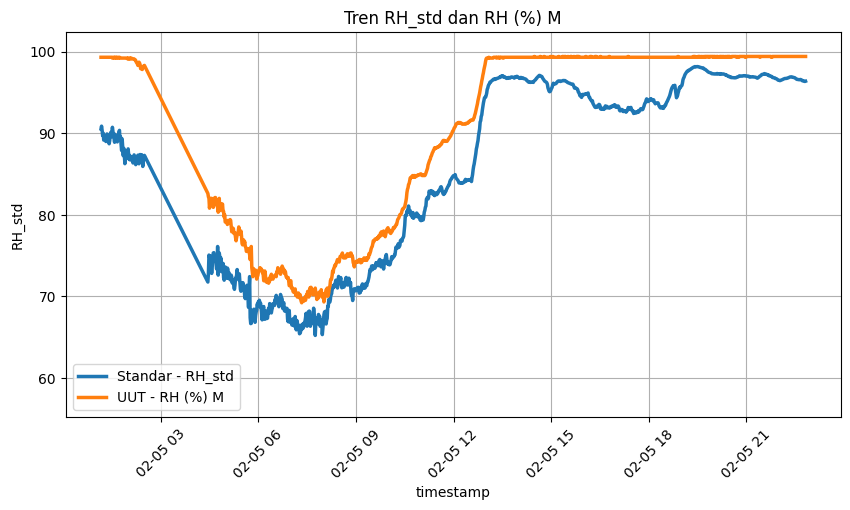

In [249]:
std_col = RH_col[0]
uut_col = RH_col[1]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df_merged['timestamp'], y=df_merged[std_col], label=f"Standar - {std_col}", ax=ax, linewidth=2.5)
sns.lineplot(x=df_merged['timestamp'], y=df_merged[uut_col], label=f"UUT - {uut_col}", ax=ax, linewidth=2.5)

y_min = min(df_merged[std_col].min(), df_merged[uut_col].min()) -10
y_max = max(df_merged[std_col].max(), df_merged[uut_col].max()) + 3
ax.set_ylim(y_min, y_max)
ax.set_title(f"Tren {std_col} dan {uut_col}")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.show(fig)